In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [254]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [255]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [256]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572235 entries, 0 to 1572234
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1572235 non-null  int64  
 1   kWh       1572235 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 24.0 MB


In [257]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1572230    0.12
1572231    0.13
1572232    0.18
1572233    0.12
1572234    0.12
Name: kWh, Length: 1572235, dtype: float64

In [258]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1572230    0.12
1572231    0.13
1572232    0.18
1572233    0.12
1572234    0.12
Name: kWh, Length: 1572235, dtype: float64

In [259]:
l=len(conso_data)-1
l

1572234

In [260]:
conso_data['sec']=conso_data['Interval']/1000


In [261]:
conso_data['Wh']=3600000/conso_data['Interval']


In [262]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [263]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572235 entries, 0 to 1572234
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1572235 non-null  int64  
 1   kWh        1572235 non-null  float64
 2   sec        1572235 non-null  float64
 3   Wh         1572235 non-null  float64
 4   cumul(ms)  1572235 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 60.0 MB


In [264]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1572230,29883,0.12,29.883,120.469832,38933710289
1572231,27629,0.13,27.629,130.297875,38933737918
1572232,19877,0.18,19.877,181.113850,38933757795
1572233,30121,0.12,30.121,119.517944,38933787916
1572234,30108,0.12,30.108,119.569550,38933818024


In [265]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

38933818024000

In [266]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 18, 55, 36, 250069)

In [267]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [268]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [269]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]



In [270]:
conso_data['dates']

0         2023-08-21 18:55:58.184069
1         2023-08-21 18:56:20.042069
2         2023-08-21 18:56:42.043069
3         2023-08-21 18:57:03.971069
4         2023-08-21 18:57:25.862069
                     ...            
1572230   2024-11-14 09:50:46.539069
1572231   2024-11-14 09:51:14.168069
1572232   2024-11-14 09:51:34.045069
1572233   2024-11-14 09:52:04.166069
1572234   2024-11-14 09:52:34.274069
Name: dates, Length: 1572235, dtype: datetime64[ns]

## créer les dates

In [271]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:55:58.184069,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:56:20.042069,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:56:42.043069,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:57:03.971069,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:57:25.862069,21/08/23
...,...,...,...,...,...,...,...
1572230,29883,0.12,29.883,120.469832,38933710289,2024-11-14 09:50:46.539069,14/11/24
1572231,27629,0.13,27.629,130.297875,38933737918,2024-11-14 09:51:14.168069,14/11/24
1572232,19877,0.18,19.877,181.113850,38933757795,2024-11-14 09:51:34.045069,14/11/24
1572233,30121,0.12,30.121,119.517944,38933787916,2024-11-14 09:52:04.166069,14/11/24


### save conso_data with dates

In [272]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [273]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('14/11/24', 14, 11, 2024)

In [274]:
here = now.strftime('%H:%M:%S')
here

'09:53:14'

In [275]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [276]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1072 entries, 1571163 to 1572234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1072 non-null   int64         
 1   kWh        1072 non-null   float64       
 2   sec        1072 non-null   float64       
 3   Wh         1072 non-null   float64       
 4   cumul(ms)  1072 non-null   int64         
 5   dates      1072 non-null   datetime64[ns]
 6   days       1072 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 67.0+ KB


In [277]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [278]:
data = list(df_grp['kWh'])
print(data)

[0.854, 3.7, 4.23, 3.686, 4.193, 4.62, 3.509, 3.402, 3.527, 3.687, 3.799, 3.759, 4.257, 3.826, 3.443, 3.64, 3.325, 3.392, 4.289, 3.999, 4.051, 3.92, 3.438, 4.47, 3.719, 3.766, 4.413, 4.668, 3.776, 3.214, 3.18, 4.019, 3.653, 3.18, 3.796, 4.172, 3.737, 3.564, 4.791, 4.176, 4.549, 3.771, 3.398, 4.31, 3.873, 3.875, 3.433, 4.078, 3.653, 3.399, 4.127, 3.386, 3.893, 3.834, 3.644, 3.75, 4.242, 3.296, 3.873, 2.969, 2.055, 2.049, 2.458, 4.09, 3.731, 4.327, 3.629, 3.902, 3.752, 3.935, 3.964, 4.124, 3.633, 3.165, 3.801, 3.552, 3.59, 3.7, 3.688, 3.234, 3.912, 3.26, 3.749, 3.594, 4.09, 3.607, 3.339, 3.825, 4.061, 4.385, 4.081, 3.998, 4.224, 3.749, 3.924, 3.869, 3.912, 3.75, 4.039, 4.343, 3.886, 3.505, 3.683, 3.674, 3.339, 3.851, 3.99, 4.108, 3.476, 4.17, 3.609, 4.101, 4.517, 3.683, 3.425, 3.576, 4.182, 3.675, 4.081, 3.981, 3.744, 3.592, 5.132, 3.699, 3.761, 4.303, 4.092, 4.748, 4.394, 3.966, 3.79, 4.362, 4.667, 4.213, 4.782, 4.336, 3.694, 4.208, 3.693, 3.628, 3.523, 3.959, 3.659, 3.787, 3.585, 3.492

In [279]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [280]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [281]:
df = conso_data
len(df)

1572235

In [282]:
period(p=2)

2023-08-22 01:02:11.987069	2023-08-22 08:06:27.607069	7h 4m 15s 	2000


In [283]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.291844
dtype: float64

In [284]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.478396
dtype: float64

In [285]:
last=df_grp.iloc[-1]['kWh']
last

1.072

In [286]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1072 entries, 1571163 to 1572234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1072 non-null   int64         
 1   kWh        1072 non-null   float64       
 2   sec        1072 non-null   float64       
 3   Wh         1072 non-null   float64       
 4   cumul(ms)  1072 non-null   int64         
 5   dates      1072 non-null   datetime64[ns]
 6   days       1072 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 67.0+ KB


In [287]:
# select day
day = today
#day = '16/08/24'


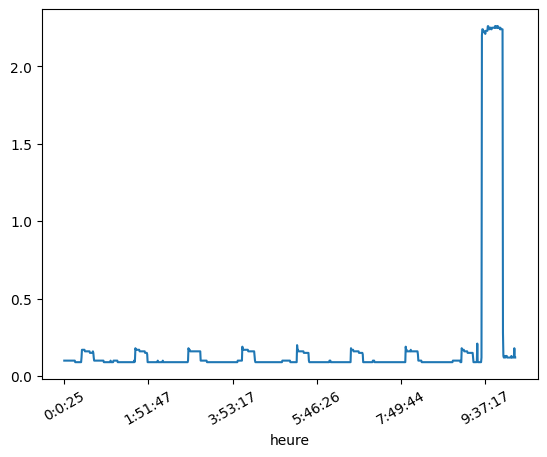

In [288]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [289]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:55:58.184069,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:56:20.042069,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:56:42.043069,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:57:03.971069,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:57:25.862069,21/08/23
...,...,...,...,...,...,...,...
1572230,29883,0.12,29.883,120.469832,38933710289,2024-11-14 09:50:46.539069,14/11/24
1572231,27629,0.13,27.629,130.297875,38933737918,2024-11-14 09:51:14.168069,14/11/24
1572232,19877,0.18,19.877,181.113850,38933757795,2024-11-14 09:51:34.045069,14/11/24
1572233,30121,0.12,30.121,119.517944,38933787916,2024-11-14 09:52:04.166069,14/11/24


In [290]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:25,37122,0.10,37.122,96.977534,38898289677,2024-11-14 00:00:25.927069,14/11/24
0:1:1,35556,0.10,35.556,101.248734,38898325233,2024-11-14 00:01:01.483069,14/11/24
0:1:36,34600,0.10,34.600,104.046243,38898359833,2024-11-14 00:01:36.083069,14/11/24
0:2:11,35602,0.10,35.602,101.117915,38898395435,2024-11-14 00:02:11.685069,14/11/24
0:2:47,36286,0.10,36.286,99.211817,38898431721,2024-11-14 00:02:47.971069,14/11/24
...,...,...,...,...,...,...,...
9:50:46,29883,0.12,29.883,120.469832,38933710289,2024-11-14 09:50:46.539069,14/11/24
9:51:14,27629,0.13,27.629,130.297875,38933737918,2024-11-14 09:51:14.168069,14/11/24
9:51:34,19877,0.18,19.877,181.113850,38933757795,2024-11-14 09:51:34.045069,14/11/24


In [291]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 02/11/24 4.085
Min : 16/10/24 1.793


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1571163,37122,0.10,37.122,96.977534,38898289677,2024-11-14 00:00:25.927069,14/11/24,0:0:25
1571164,35556,0.10,35.556,101.248734,38898325233,2024-11-14 00:01:01.483069,14/11/24,0:1:1
1571165,34600,0.10,34.600,104.046243,38898359833,2024-11-14 00:01:36.083069,14/11/24,0:1:36
1571166,35602,0.10,35.602,101.117915,38898395435,2024-11-14 00:02:11.685069,14/11/24,0:2:11
1571167,36286,0.10,36.286,99.211817,38898431721,2024-11-14 00:02:47.971069,14/11/24,0:2:47
...,...,...,...,...,...,...,...,...
1572230,29883,0.12,29.883,120.469832,38933710289,2024-11-14 09:50:46.539069,14/11/24,9:50:46
1572231,27629,0.13,27.629,130.297875,38933737918,2024-11-14 09:51:14.168069,14/11/24,9:51:14
1572232,19877,0.18,19.877,181.113850,38933757795,2024-11-14 09:51:34.045069,14/11/24,9:51:34
1572233,30121,0.12,30.121,119.517944,38933787916,2024-11-14 09:52:04.166069,14/11/24,9:52:4


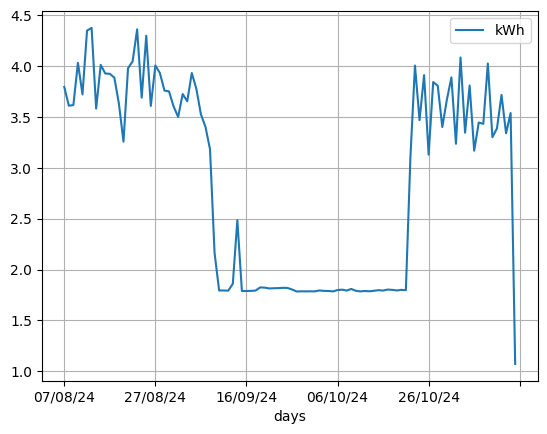

In [292]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-11-14 00:00:25.927069	2024-11-14 09:37:16.145069	9h 36m 50s 	1000
2024-11-14 09:37:16.145069	2024-11-14 09:52:34.274069	0h 15m 18s 	72
<class 'pandas.core.frame.DataFrame'>
Index: 1072 entries, 1571163 to 1572234
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1072 non-null   int64         
 1   kWh        1072 non-null   float64       
 2   sec        1072 non-null   float64       
 3   Wh         1072 non-null   float64       
 4   cumul(ms)  1072 non-null   int64         
 5   dates      1072 non-null   datetime64[ns]
 6   days       1072 non-null   object        
 7   heure      1072 non-null   object        
 8   hours      1072 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 83.8+ KB


('14/11/24', <Axes: xlabel='hours'>)

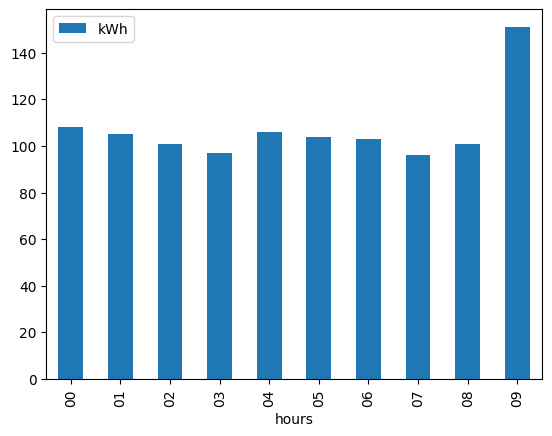

In [293]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [294]:
df_grp

,kWh
days,
21/08/23,0.854
22/08/23,3.700
23/08/23,4.230
24/08/23,3.686
25/08/23,4.193
...,...
10/11/24,3.387
11/11/24,3.716
12/11/24,3.339


In [295]:
# select number of days to display
span = 30
#df_grp.tail(span)


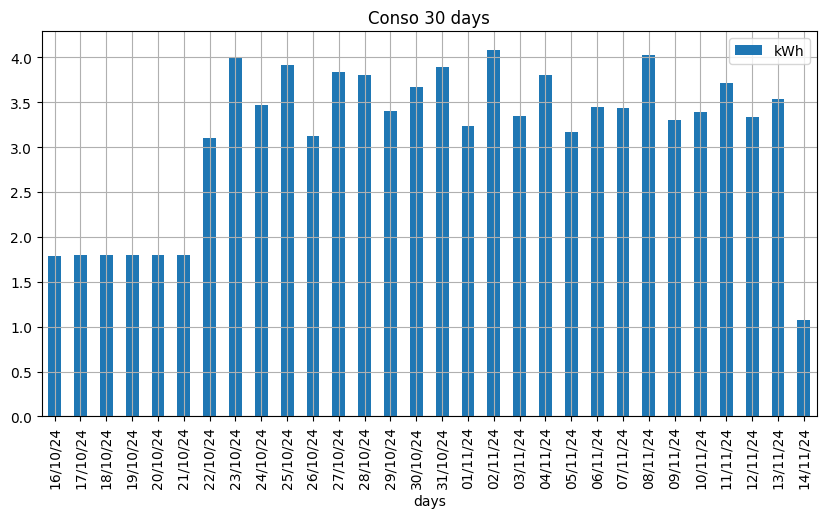

In [296]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


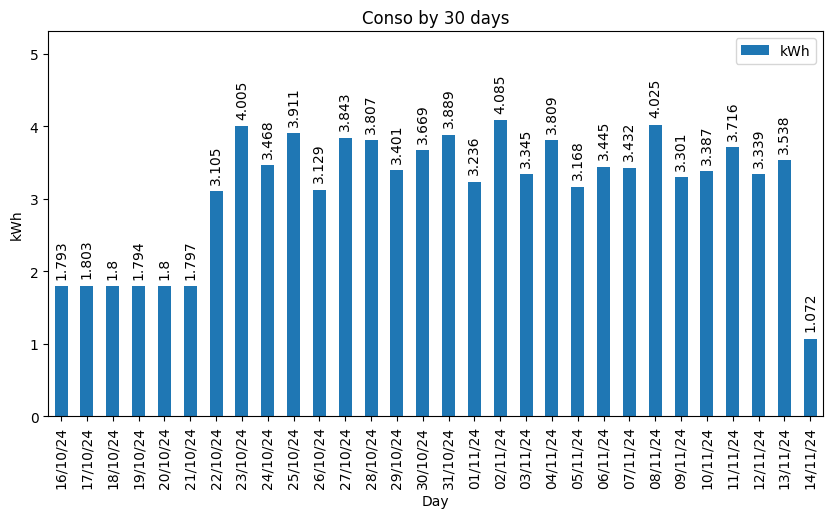

In [297]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [298]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
16/10/24    1.793
17/10/24    1.803
18/10/24    1.800
19/10/24    1.794
20/10/24    1.800
21/10/24    1.797
22/10/24    3.105
23/10/24    4.005
24/10/24    3.468
25/10/24    3.911
26/10/24    3.129
27/10/24    3.843
28/10/24    3.807
29/10/24    3.401
30/10/24    3.669
31/10/24    3.889
01/11/24    3.236
02/11/24    4.085
03/11/24    3.345
04/11/24    3.809
05/11/24    3.168
06/11/24    3.445
07/11/24    3.432
08/11/24    4.025
09/11/24    3.301
10/11/24    3.387
11/11/24    3.716
12/11/24    3.339
13/11/24    3.538
14/11/24    1.072
Name: kWh, dtype: float64

In [299]:
x_labels=df_grp.tail(span).index
x_labels

Index(['16/10/24', '17/10/24', '18/10/24', '19/10/24', '20/10/24', '21/10/24',
       '22/10/24', '23/10/24', '24/10/24', '25/10/24', '26/10/24', '27/10/24',
       '28/10/24', '29/10/24', '30/10/24', '31/10/24', '01/11/24', '02/11/24',
       '03/11/24', '04/11/24', '05/11/24', '06/11/24', '07/11/24', '08/11/24',
       '09/11/24', '10/11/24', '11/11/24', '12/11/24', '13/11/24', '14/11/24'],
      dtype='object', name='days')

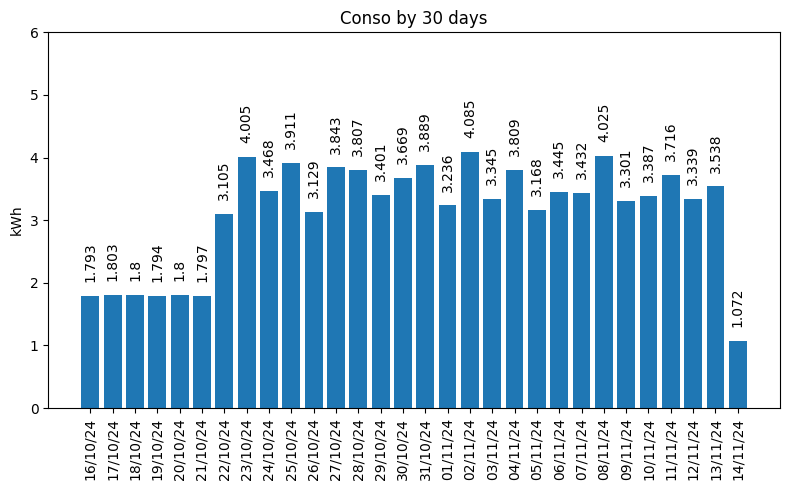

In [300]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [301]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

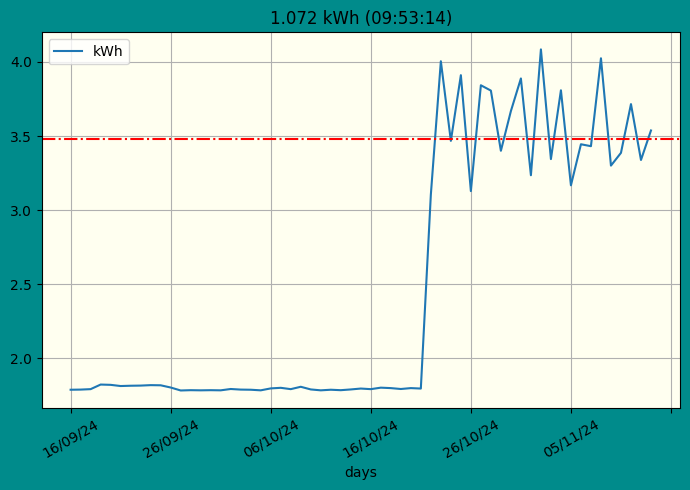

In [302]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

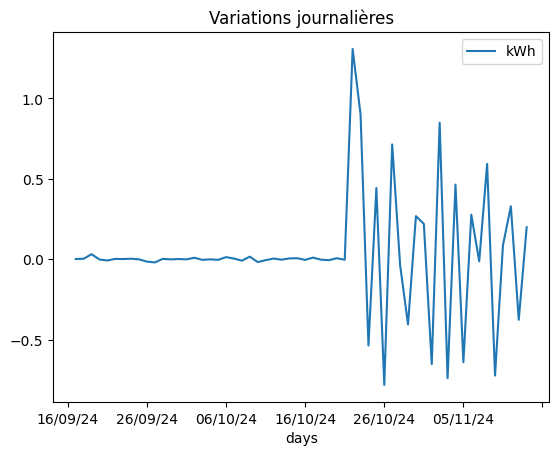

In [303]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [304]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:55:58.184069,21/08/23,18
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:56:20.042069,21/08/23,18
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:56:42.043069,21/08/23,18
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:57:03.971069,21/08/23,18
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:57:25.862069,21/08/23,18
...,...,...,...,...,...,...,...,...
1572230,29883,0.12,29.883,120.469832,38933710289,2024-11-14 09:50:46.539069,14/11/24,09
1572231,27629,0.13,27.629,130.297875,38933737918,2024-11-14 09:51:14.168069,14/11/24,09
1572232,19877,0.18,19.877,181.113850,38933757795,2024-11-14 09:51:34.045069,14/11/24,09
1572233,30121,0.12,30.121,119.517944,38933787916,2024-11-14 09:52:04.166069,14/11/24,09


In [305]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [306]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [307]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [308]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [309]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,854
22/08/23,3700
23/08/23,4230
24/08/23,3686
25/08/23,4193
...,...
10/11/24,3387
11/11/24,3716
12/11/24,3339


In [310]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:55:58.184069,21/08/23,18
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:56:20.042069,21/08/23,18
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:56:42.043069,21/08/23,18
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:57:03.971069,21/08/23,18
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:57:25.862069,21/08/23,18
...,...,...,...,...,...,...,...,...
1572230,29883,0.12,29.883,120.469832,38933710289,2024-11-14 09:50:46.539069,14/11/24,09
1572231,27629,0.13,27.629,130.297875,38933737918,2024-11-14 09:51:14.168069,14/11/24,09
1572232,19877,0.18,19.877,181.113850,38933757795,2024-11-14 09:51:34.045069,14/11/24,09
1572233,30121,0.12,30.121,119.517944,38933787916,2024-11-14 09:52:04.166069,14/11/24,09


In [311]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 18    0        21/08/23    18  0.16
               1        21/08/23    18  0.16
               2        21/08/23    18  0.16
               3        21/08/23    18  0.16
               4        21/08/23    18  0.16
...                          ...   ...   ...
14/11/24 09    1572230  14/11/24    09  0.12
               1572231  14/11/24    09  0.13
               1572232  14/11/24    09  0.18
               1572233  14/11/24    09  0.12
               1572234  14/11/24    09  0.12

[1572235 rows x 3 columns]

In [312]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [313]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '18'), ('21/08/23', '19'), ('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '18'), ('22/08/23', '19'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('23/08/23', '18'), ('23/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/2

In [314]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,854,854
22/08/23,3700,3700
23/08/23,4230,4230
24/08/23,3686,3686
25/08/23,4193,4193
...,...,...
10/11/24,3387,3387
11/11/24,3716,3716
12/11/24,3339,3339


In [315]:
grp_by_day['kWh'].cumsum()

days
21/08/23        854
22/08/23       4554
23/08/23       8784
24/08/23      12470
25/08/23      16663
             ...   
10/11/24    1560570
11/11/24    1564286
12/11/24    1567625
13/11/24    1571163
14/11/24    1572235
Name: kWh, Length: 452, dtype: int64

In [316]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 18      12
         19     171
         20     281
         21     129
         22     130
...             ...
14/11/24 05     104
         06     103
         07      96
         08     101
         09     151

[10816 rows x 1 columns]

In [317]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  18            12
          19           183
          20           464
          21           593
          22           723
                    ...   
14/11/24  05       1571784
          06       1571887
          07       1571983
          08       1572084
          09       1572235
Name: kWh, Length: 10816, dtype: int64

In [318]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 18      12      12    NaN
         19     171     183  159.0
         20     281     464  110.0
         21     129     593 -152.0
         22     130     723    1.0
...             ...     ...    ...
14/11/24 05     104     621   -2.0
         06     103     724   -1.0
         07      96     820   -7.0
         08     101     921    5.0
         09     151    1072   50.0

[10816 rows x 3 columns]

In [319]:
today, grp_by_dayhours.loc[today]

('14/11/24',
        kWh  cumsum  diff
 hours                   
 00     108     108   NaN
 01     105     213  -3.0
 02     101     314  -4.0
 03      97     411  -4.0
 04     106     517   9.0
 05     104     621  -2.0
 06     103     724  -1.0
 07      96     820  -7.0
 08     101     921   5.0
 09     151    1072  50.0)

Text(0.5, 1.0, 'Cumul journalier')

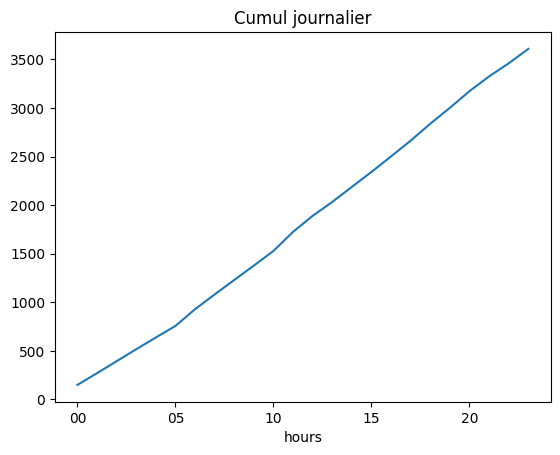

In [320]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

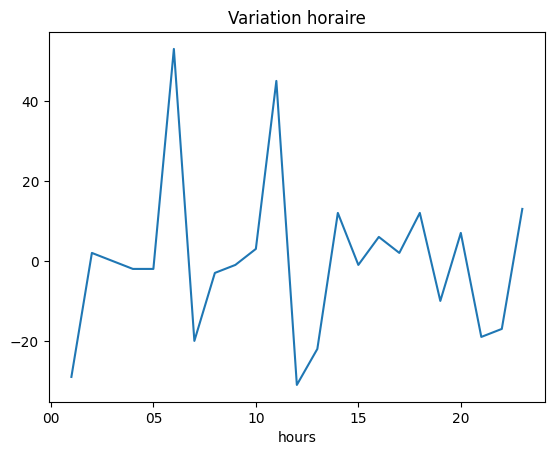

In [321]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [322]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

452

In [323]:
df_grp.tail(n)['kWh'].describe()


count    452.000000
mean       3.478396
std        0.716695
min        0.854000
25%        3.338500
50%        3.609500
75%        3.880750
max        5.132000
Name: kWh, dtype: float64

In [324]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '452 days')

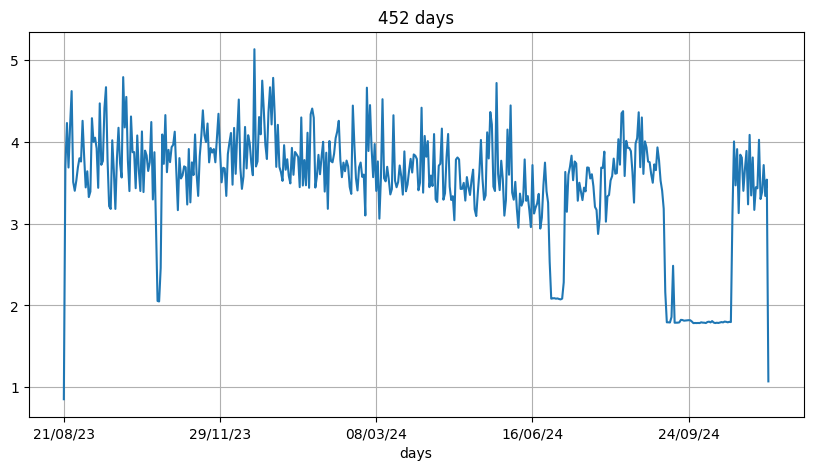

In [325]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '100 days')

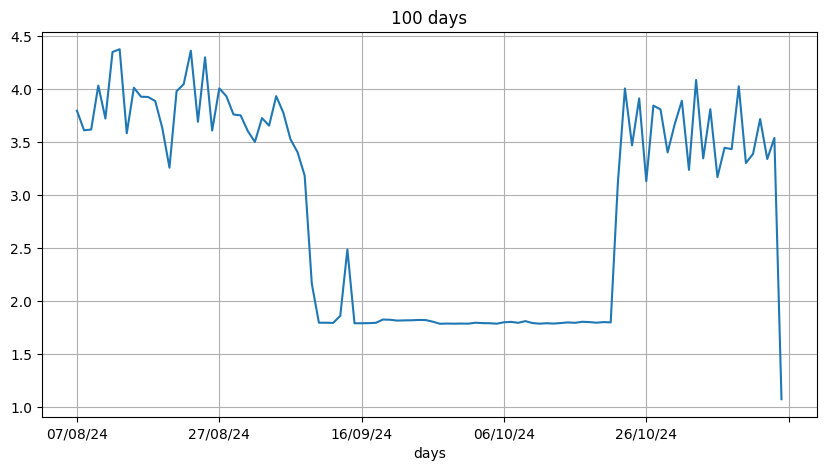

In [326]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [327]:
df_grp['kWh']

days
21/08/23    0.854
22/08/23    3.700
23/08/23    4.230
24/08/23    3.686
25/08/23    4.193
            ...  
10/11/24    3.387
11/11/24    3.716
12/11/24    3.339
13/11/24    3.538
14/11/24    1.072
Name: kWh, Length: 452, dtype: float64

In [328]:
df_grp.describe()

,kWh
count,452.000000
mean,3.478396
std,0.716695
min,0.854000
25%,3.338500
50%,3.609500
75%,3.880750
max,5.132000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

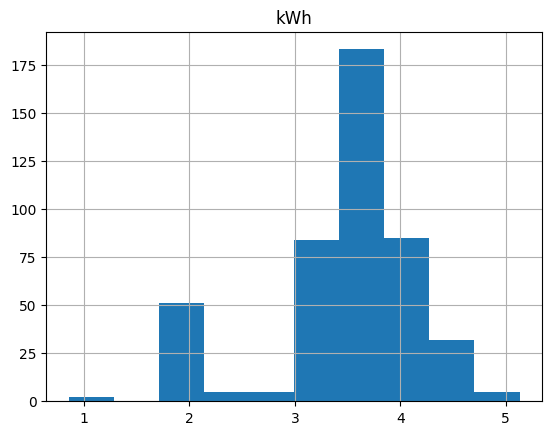

In [329]:
# 
df_grp.hist()

In [330]:
df_grp.tail(span)['kWh']

days
07/08/24    3.795
08/08/24    3.610
09/08/24    3.617
10/08/24    4.032
11/08/24    3.721
            ...  
10/11/24    3.387
11/11/24    3.716
12/11/24    3.339
13/11/24    3.538
14/11/24    1.072
Name: kWh, Length: 100, dtype: float64

# Conso par heure

In [331]:
day

'14/11/24'

In [332]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,108,108,NaN
01,105,213,-3.0
02,101,314,-4.0
03,97,411,-4.0
04,106,517,9.0
05,104,621,-2.0
06,103,724,-1.0
07,96,820,-7.0
08,101,921,5.0


In [333]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


10

In [334]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 11)

In [335]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [336]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [337]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
Name: days, dtype: float64

In [338]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [339]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 00 to 09
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     10 non-null     int64  
 1   cumsum  10 non-null     int64  
 2   diff    9 non-null      float64
 3   days    10 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 400.0+ bytes


In [340]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
Name: days, dtype: float64

In [341]:
day

'14/11/24'

In [342]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,108,108,NaN,1.0
01,105,213,-3.0,2.0
02,101,314,-4.0,3.0
03,97,411,-4.0,4.0
04,106,517,9.0,5.0
05,104,621,-2.0,6.0
06,103,724,-1.0,7.0
07,96,820,-7.0,8.0
08,101,921,5.0,9.0


Text(0.5, 1.0, '14/11/24')

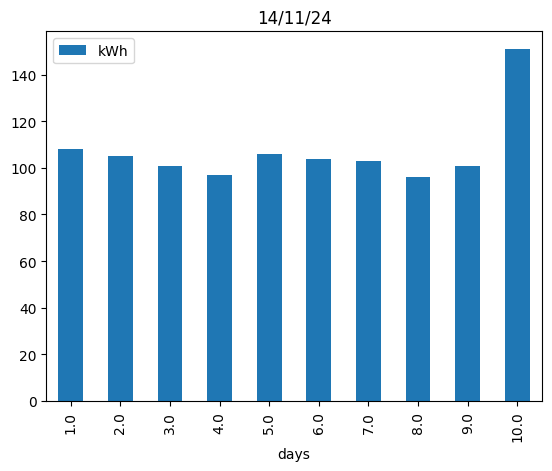

In [343]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [344]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09'], dtype='object', name='hours')

# Conso du jour


In [345]:
groupedbyhour.count()

,kWh
hours,
00,108
01,105
02,101
03,97
04,106
05,104
06,103
07,96
08,101


In [346]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    168
01    159
02    160
03    167
04    146
05    131
06    128
07    117
08    130
09    115
10    130
11    130
12    174
13    157
14    147
15    474
16    659
17    248
18    305
19    282
20    319
21    324
22    192
23    170
Name: kWh, dtype: int64

In [347]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# Today

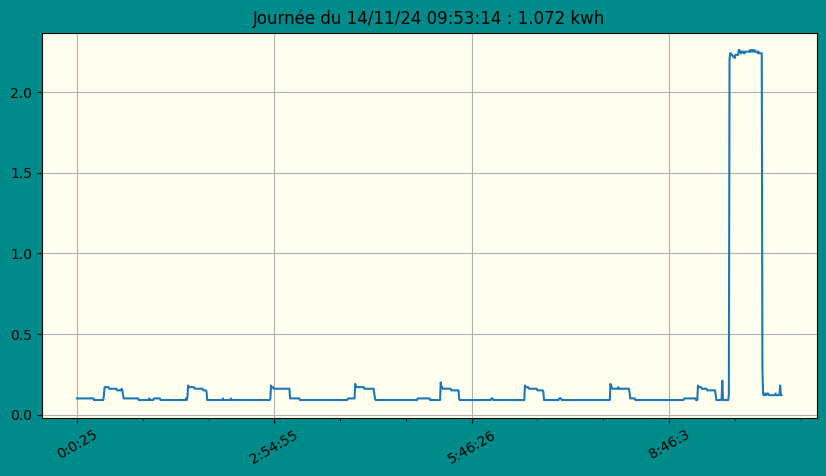

In [348]:
show(today,bgcolor='ivory')

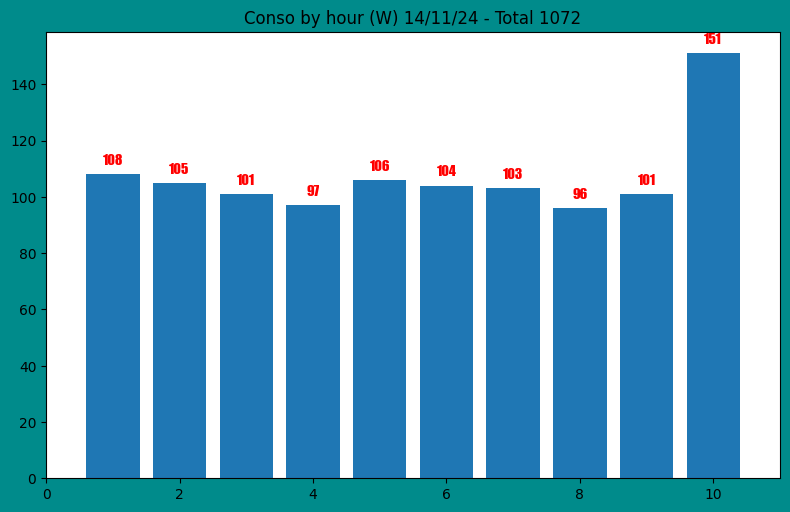

In [349]:
conso_by_hour(today)

('21/12/23', None)

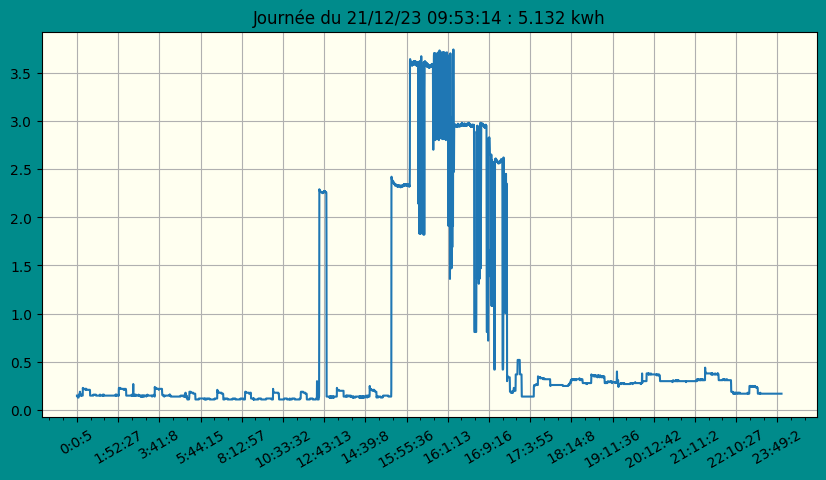

In [350]:
day, show(day,bgcolor='ivory')

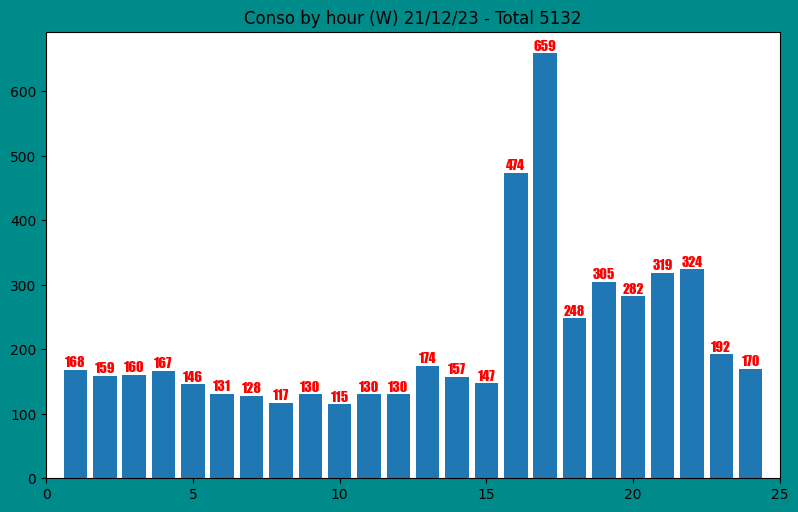

In [351]:
conso_by_hour(day)

('21/12/23', None)

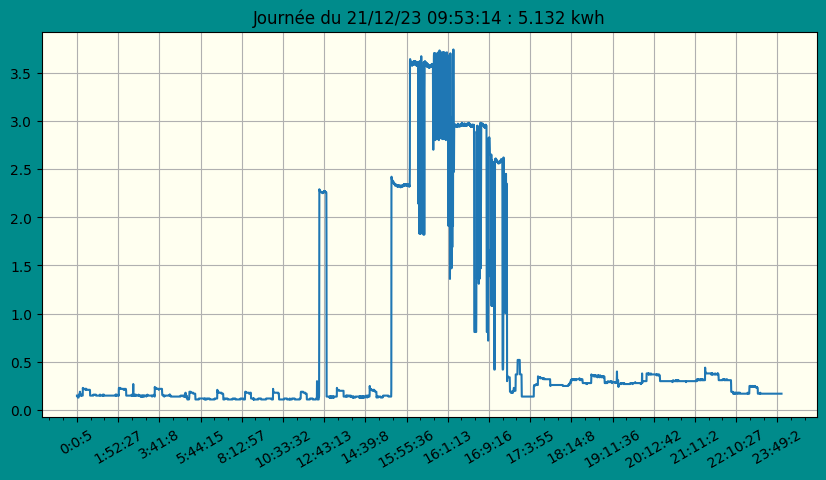

In [352]:
# retour vietnam 22/10/2024
day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

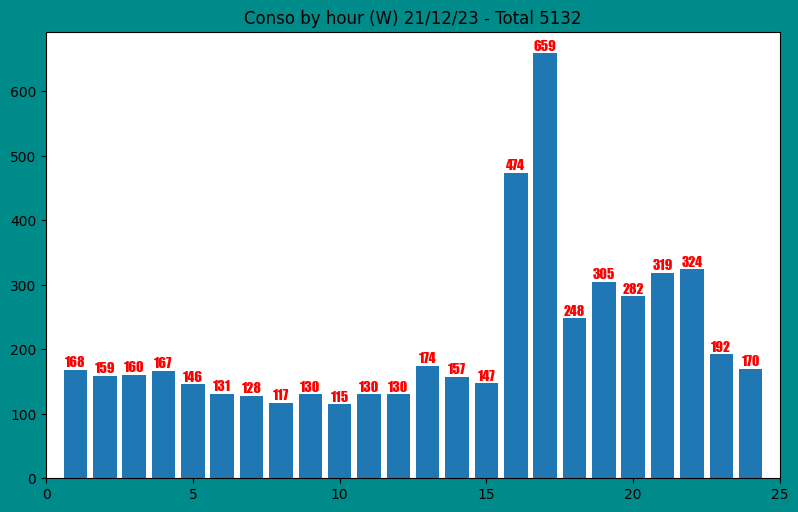

In [353]:
conso_by_hour(day)

In [354]:
sum(data)

5132

In [355]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,108,108,NaN,1.0
01,105,213,-3.0,2.0
02,101,314,-4.0,3.0
03,97,411,-4.0,4.0
04,106,517,9.0,5.0
05,104,621,-2.0,6.0
06,103,724,-1.0,7.0
07,96,820,-7.0,8.0
08,101,921,5.0,9.0


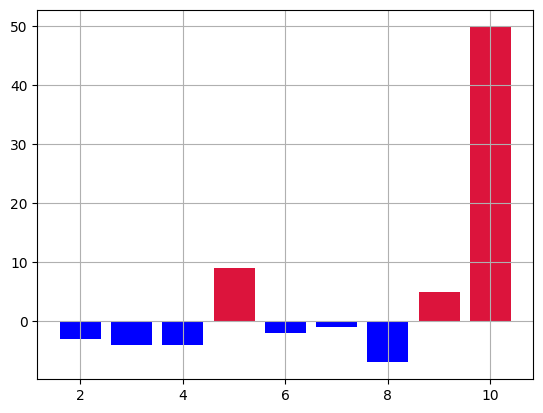

In [356]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [357]:
data

hours
00    168
01    159
02    160
03    167
04    146
05    131
06    128
07    117
08    130
09    115
10    130
11    130
12    174
13    157
14    147
15    474
16    659
17    248
18    305
19    282
20    319
21    324
22    192
23    170
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

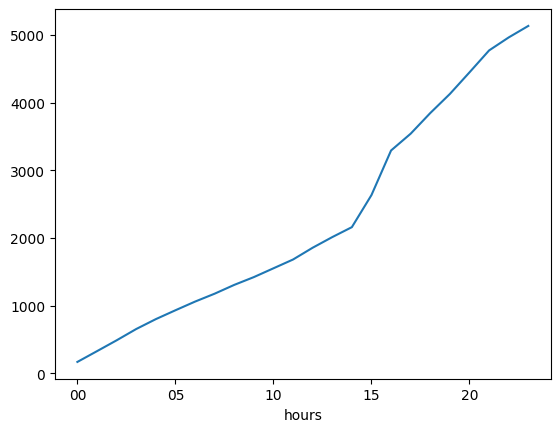

In [358]:
data.cumsum().plot()


<Axes: xlabel='hours'>

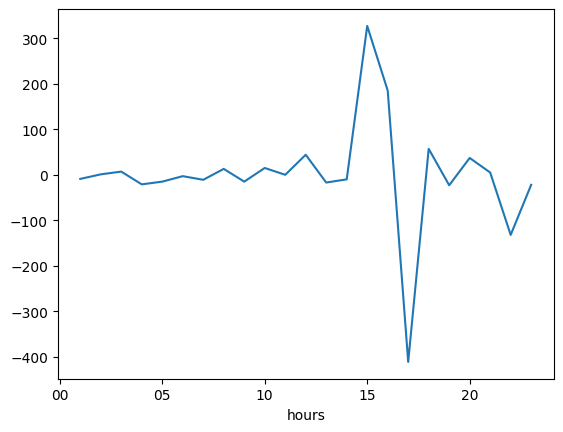

In [359]:
# evolution par heure
data.diff().plot()

In [360]:
data.diff().describe()

count     23.000000
mean       0.086957
std      123.771385
min     -411.000000
25%      -16.000000
50%       -3.000000
75%       14.000000
max      327.000000
Name: kWh, dtype: float64

<Axes: >

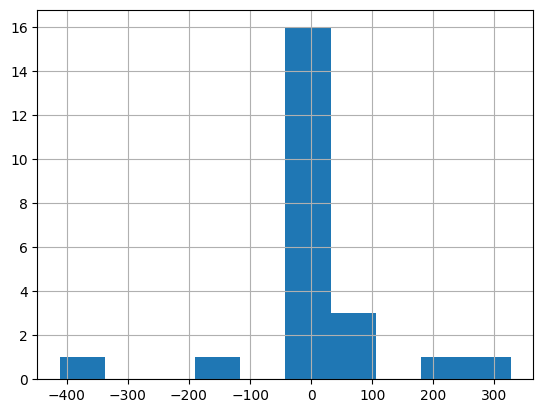

In [361]:
data.diff().hist()

# Test sauvegarde

In [362]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipy

In [363]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [364]:
#conso_byhour(day)

In [365]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


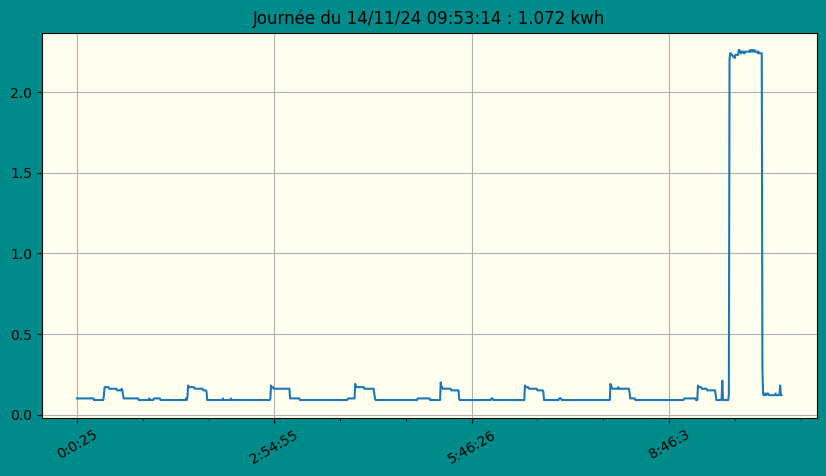

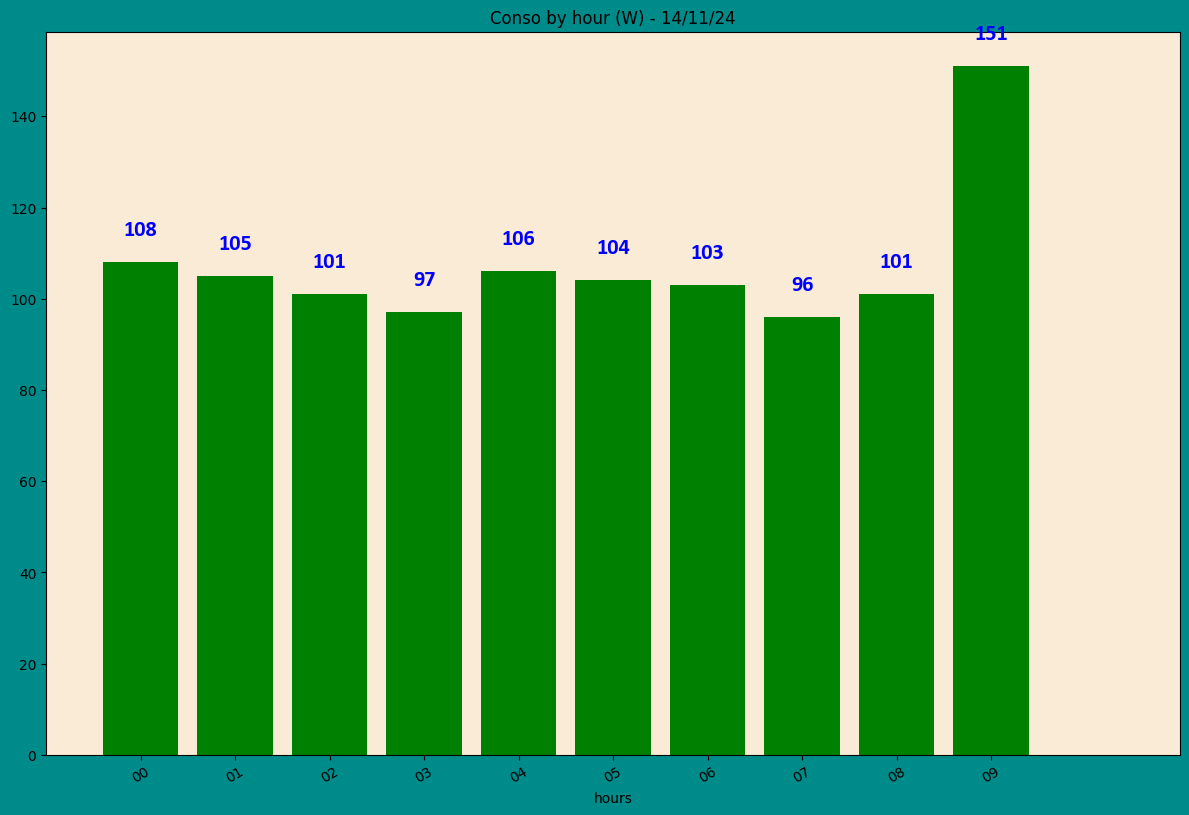

In [366]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [367]:
month.describe()


count    30.000000
mean      3.154567
std       0.806788
min       1.793000
25%       3.111000
50%       3.394000
75%       3.784250
max       4.085000
Name: kWh, dtype: float64

<Axes: >

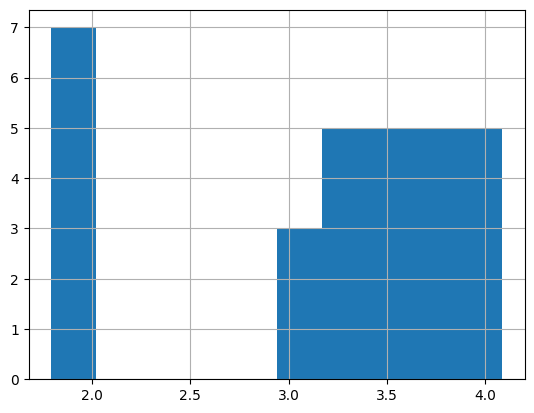

In [368]:
month.hist()

<Axes: xlabel='days'>

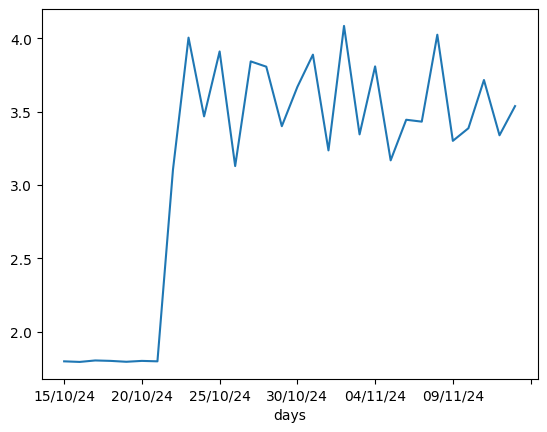

In [369]:
month.plot()

In [370]:
# date with max conso in 1 month
month.idxmax()

'02/11/24'

In [371]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'02/11/24'

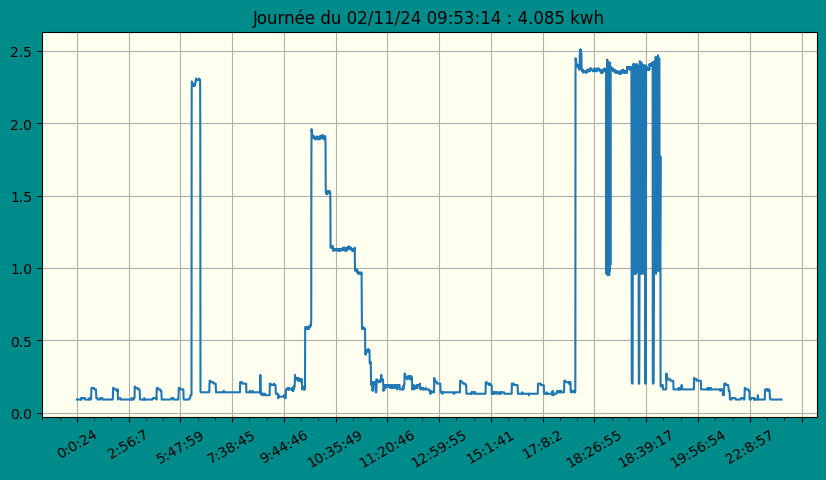

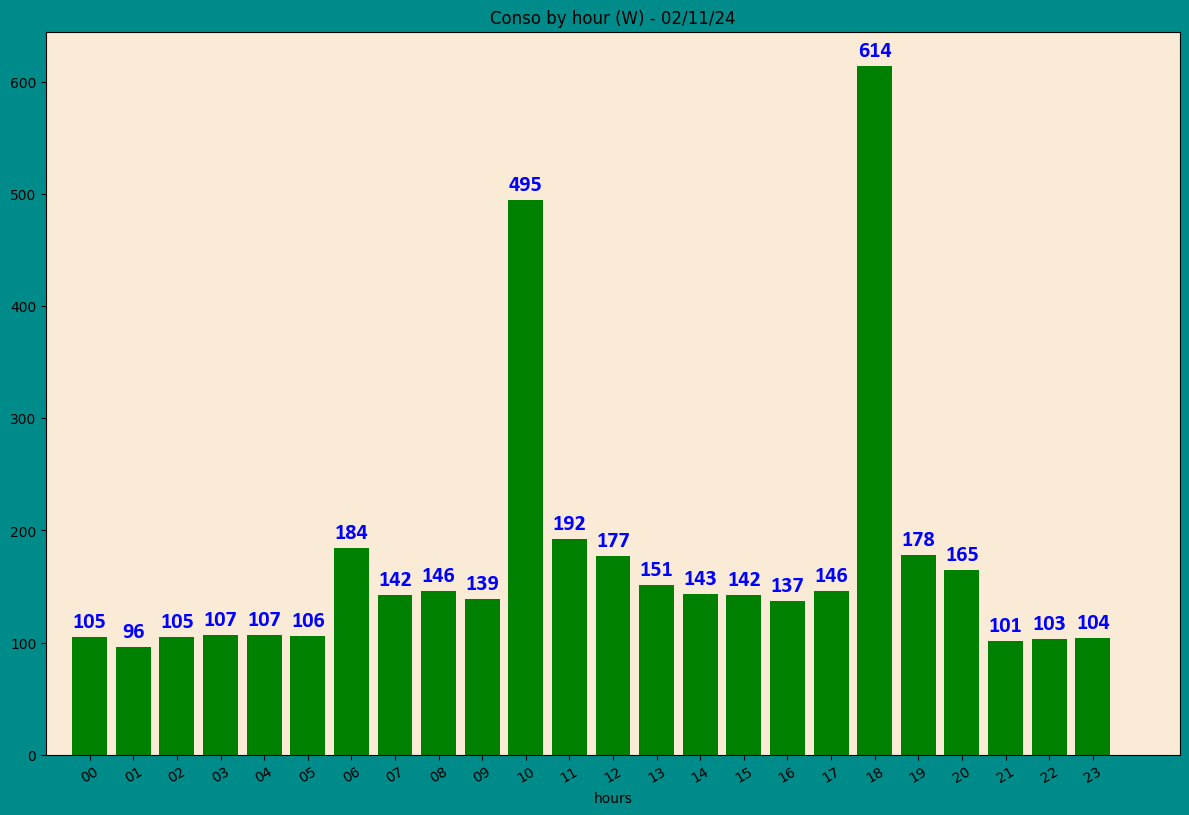

In [372]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [373]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 18      12      12    NaN   NaN
         19     171     183  159.0   NaN
         20     281     464  110.0   NaN
         21     129     593 -152.0   NaN
         22     130     723    1.0   NaN
...             ...     ...    ...   ...
14/11/24 05     104     621   -2.0   6.0
         06     103     724   -1.0   7.0
         07      96     820   -7.0   8.0
         08     101     921    5.0   9.0
         09     151    1072   50.0  10.0

[10816 rows x 4 columns]

In [374]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,105,105,NaN,NaN
01,96,201,-9.0,NaN
02,105,306,9.0,NaN
03,107,413,2.0,NaN
04,107,520,0.0,NaN
05,106,626,-1.0,NaN
06,184,810,78.0,NaN
07,142,952,-42.0,NaN
08,146,1098,4.0,NaN


In [375]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

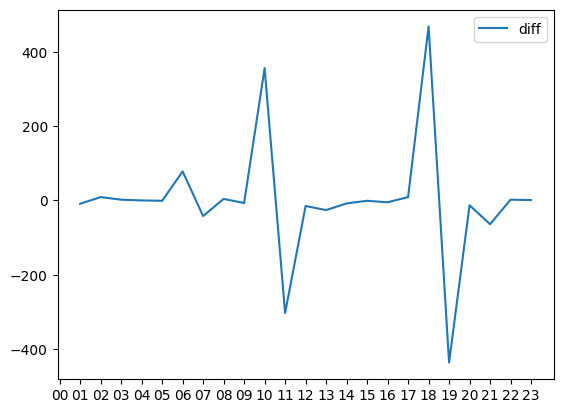

In [376]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

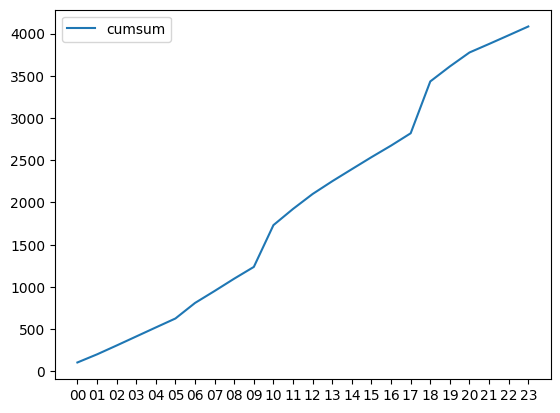

In [377]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [378]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB